In [29]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

import seaborn as sns
import matplotlib.pyplot as plt



In [30]:
df = pd.read_csv("/content/adult_with_headers.csv")
df.head()



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [31]:
df = df.replace("?", np.nan)

for col in df.select_dtypes(include="object").columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)

df.isna().sum()



/tmp/ipython-input-452177768.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-452177768.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [32]:
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(include="object").columns

num_cols, cat_cols


(Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
        'hours_per_week'],
       dtype='object'),
 Index(['workclass', 'education', 'marital_status', 'occupation',
        'relationship', 'race', 'sex', 'native_country', 'income'],
       dtype='object'))

In [33]:
cat_cols = df.select_dtypes(include="object").columns

low_cardinality = [c for c in cat_cols if df[c].nunique() < 5]
df_encoded = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

high_cardinality = [c for c in cat_cols if c not in low_cardinality]
le = LabelEncoder()
for col in high_cardinality:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,True,False
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,True,False
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,True,False
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,True,False
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,False,False


In [34]:

df_encoded["net_capital"] = df_encoded["capital_gain"] - df_encoded["capital_loss"]
df_encoded["work_intensity"] = df_encoded["hours_per_week"] / df_encoded["age"]

df_encoded[["net_capital", "work_intensity"]].head()



,net_capital,work_intensity
0,2174,1.025641
1,0,0.260000
2,0,1.052632
3,0,0.754717
4,0,1.428571


In [35]:
df_encoded["log_capital_gain"] = np.log1p(df_encoded["capital_gain"])
df_encoded[["log_capital_gain"]].head()



,log_capital_gain
0,7.684784
1,0.000000
2,0.000000
3,0.000000
4,0.000000


In [36]:
scaler = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler.fit_transform(df[num_cols])

df_std.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [37]:
minmax = MinMaxScaler()
df_mm = df.copy()
df_mm[num_cols] = minmax.fit_transform(df[num_cols])

df_mm.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [38]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [39]:



df.describe(include="all")


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [40]:
df.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [41]:
num_cols = df_encoded.select_dtypes(include=np.number).columns

std = StandardScaler()
mm = MinMaxScaler()

df_std = df_encoded.copy()
df_mm = df_encoded.copy()

df_std[num_cols] = std.fit_transform(df_encoded[num_cols])
df_mm[num_cols] = mm.fit_transform(df_encoded[num_cols])

df_std[num_cols].head(), df_mm[num_cols].head()



(        age  workclass    fnlwgt  education  education_num  marital_status  \
 0  0.030671   2.150579 -1.063611  -0.335437       1.134739        0.921634   
 1  0.837109   1.463736 -1.008707  -0.335437       1.134739       -0.406212   
 2 -0.042642   0.090050  0.245079   0.181332      -0.420060       -1.734058   
 3  1.057047   0.090050  0.425801  -2.402511      -1.197459       -0.406212   
 4 -0.775768   0.090050  1.408176  -0.335437       1.134739       -0.406212   
 
    occupation  relationship      race  capital_gain  capital_loss  \
 0   -1.317809     -0.277805  0.393668      0.148453      -0.21666   
 1   -0.608387     -0.900181  0.393668     -0.145920      -0.21666   
 2   -0.135438     -0.277805  0.393668     -0.145920      -0.21666   
 3   -0.135438     -0.900181 -1.962621     -0.145920      -0.21666   
 4    0.810458      2.211698 -1.962621     -0.145920      -0.21666   
 
    hours_per_week  native_country  net_capital  work_intensity  \
 0       -0.035429        0.291569 

In [54]:

iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(df_encoded[num_cols])

df_encoded["outlier"] = outliers
df_clean = df_encoded[df_encoded["outlier"] == 1]

df_encoded.shape, df_clean.shape



((32561, 19), (30933, 19))

In [55]:
df_clean.shape

(30933, 19)

In [56]:
import sys
!{sys.executable} -m pip install --upgrade pip setuptools wheel
!{sys.executable} -m pip install ppscore

  Using cached setuptools-82.0.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 43.1 MB/s eta 0:00:00
Using cached setuptools-82.0.0-py3-none-any.whl (1.0 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
  Using cached ppscore-1.3.0.tar.gz (17 kB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> No available output.
  
  note: Th

In [58]:
pps_matrix = df_clean.corr(numeric_only=True)
pps_matrix.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,net_capital,work_intensity,log_capital_gain,outlier
age,1.000000,0.033578,-0.078118,-0.000042,0.040951,-0.295275,-0.005404,-0.277754,0.035270,0.069771,0.048433,0.113472,0.017103,0.099156,0.233222,0.055495,-0.671783,0.064041,NaN
workclass,0.033578,1.000000,-0.017203,0.006175,0.031319,-0.057280,0.227350,-0.089654,0.045306,0.019896,0.019194,0.115727,-0.010269,0.089392,0.038778,0.014539,0.017838,0.022063,NaN
fnlwgt,-0.078118,-0.017203,1.000000,-0.028835,-0.045091,0.029235,-0.000866,0.008689,-0.029348,-0.015480,-0.013436,-0.025075,-0.057041,0.027668,-0.011925,-0.011670,0.048377,-0.016653,NaN
education,-0.000042,0.006175,-0.028835,1.000000,0.344296,-0.035626,-0.031321,-0.006965,0.006349,0.014875,0.019556,0.047858,0.057467,-0.034546,0.069113,0.009627,0.021438,0.016914,NaN
education_num,0.040951,0.031319,-0.045091,0.344296,1.000000,-0.058404,0.099293,-0.091692,0.030311,0.091485,0.081669,0.136753,0.057166,0.001791,0.311904,0.068427,0.014687,0.067214,NaN


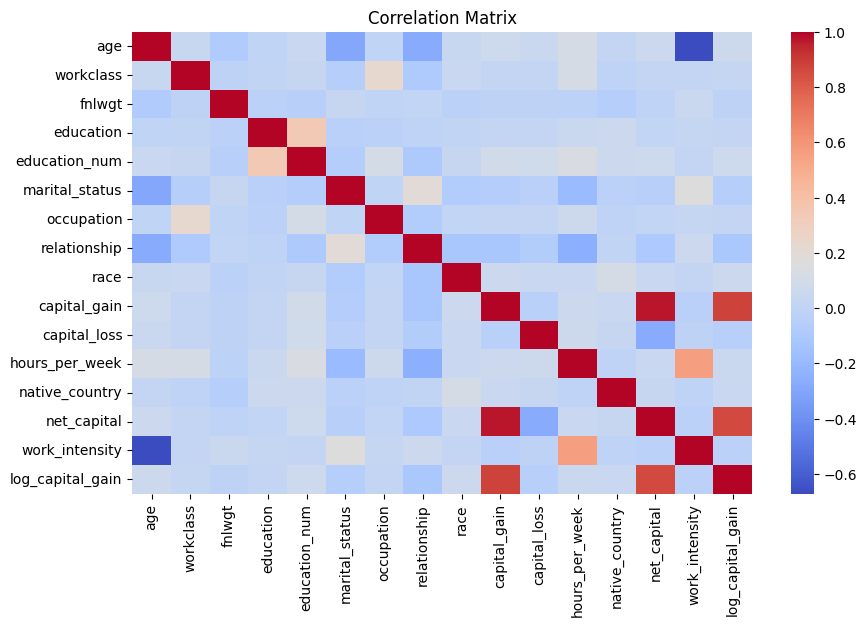

In [59]:

plt.figure(figsize=(10,6))
sns.heatmap(df_clean[num_cols].corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
